# **Solar Challenge – Exploratory Data Analysis (EDA)**

This notebook performs EDA for **<COUNTRY_NAME>**.

**Objectives:**
1. Examine data quality and missing values.
2. Detect outliers and clean dataset.
3. Explore time series patterns.
4. Assess cleaning impact.
5. Analyze correlations and relationships.
6. Investigate wind and distribution behavior.
7. Analyze temperature and create bubble charts.


In [31]:
# -------------------------------------------
# Benin EDA Notebook
# -------------------------------------------

# 1️⃣ Setup imports and repo path
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

# Add repo root to sys.path so 'src' can be imported
repo_root = Path(r"D:\Python\Week_01\Assignment\solar-challenge-week0")
if str(repo_root) not in sys.path:
    sys.path.append(str(repo_root))

# Import src modules
from src.data_loader import load_country_data
from src.preprocess import preprocess_dataset
from src.analyze import run_full_analysis

# 2️⃣ Dataset configuration
FILENAME = "togo-dapaong_qc.csv"
COUNTRY_NAME = "togo"
TIMESTAMP_COL = "timestamp"

# 3️⃣ Load raw dataset
df_raw = load_country_data(FILENAME)
print(f"Raw dataset shape: {df_raw.shape}")
display(df_raw.head())


Raw dataset shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## 1️⃣ Summary Statistics & Missing-Value Report

In [32]:

# -------------------------------------------
# 1️⃣ Summary Statistics & Missing-Value Report
# -------------------------------------------
display(df_raw.describe())
print(df_raw.isna().sum())
null_threshold = 0.05
cols_with_nulls = df_raw.isna().mean()[df_raw.isna().mean() > null_threshold].index.tolist()
print("Columns with >5% nulls:", cols_with_nulls)


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Columns with >5% nulls: ['Comments']


## 2️⃣ Outlier Detection & Basic Cleaning

In [33]:

# -------------------------------------------
# 2️⃣ Outlier Detection & Basic Cleaning
# -------------------------------------------
numeric_cols = ["ghi", "dni", "dhi", "moda", "modb", "ws", "wsgust"]
df_clean = preprocess_dataset(df_raw, country=COUNTRY_NAME)
df_zscores = df_clean[numeric_cols].apply(zscore)
outliers = (df_zscores.abs() > 3).sum()
print("Number of outliers per column:\n", outliers)

# Save cleaned dataset
from pathlib import Path

# Define repo root (1 level up from notebooks folder)
repo_root = Path(r"D:\Python\Week_01\Assignment\solar-challenge-week0")

# Define data folder inside repo
data_dir = repo_root / "data"
data_dir.mkdir(exist_ok=True)  # ensures the folder exists

# Save cleaned file in that folder
output_file = data_dir / f"{COUNTRY_NAME}_clean.csv"
df_clean.to_csv(output_file, index=False)

print(f"✅ Cleaned dataset saved to: {output_file}")


✅ Saved file: data/togo_clean.csv
Number of outliers per column:
 ghi         17
dni        268
dhi       1540
moda         3
modb         5
ws        1430
wsgust     946
dtype: int64
✅ Cleaned dataset saved to: D:\Python\Week_01\Assignment\solar-challenge-week0\data\togo_clean.csv


## 3️⃣ Time Series Analysis

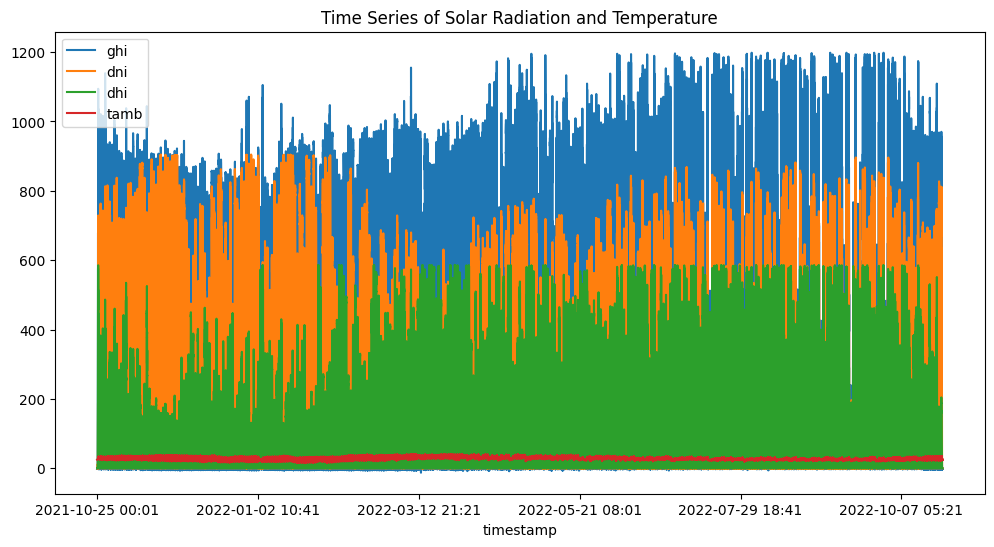

In [34]:

# -------------------------------------------
# 3️⃣ Time Series Analysis
# -------------------------------------------
df_clean.plot(x=TIMESTAMP_COL, y=["ghi","dni","dhi","tamb"], figsize=(12,6))
plt.title("Time Series of Solar Radiation and Temperature")
plt.show()


## 4️⃣ Cleaning Impact

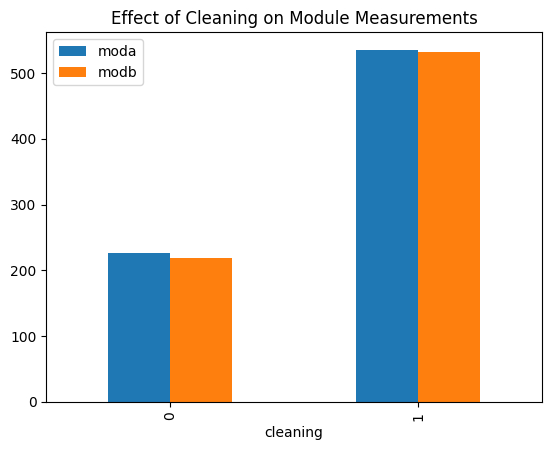

In [35]:

# -------------------------------------------
# 4️⃣ Cleaning Impact
# -------------------------------------------
df_clean.groupby("cleaning")[["moda","modb"]].mean().plot(kind="bar")
plt.title("Effect of Cleaning on Module Measurements")
plt.show()


## 5️⃣ Correlation & Relationship Analysis

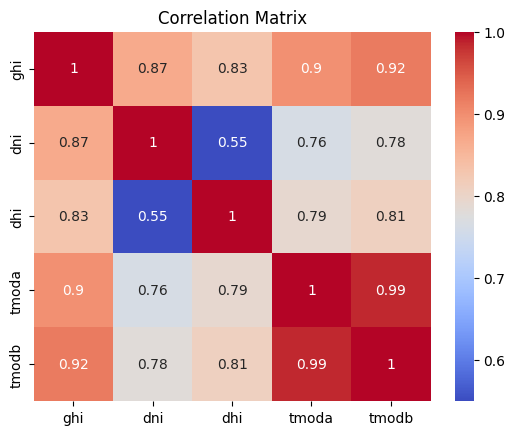

<Axes: xlabel='ws', ylabel='ghi'>

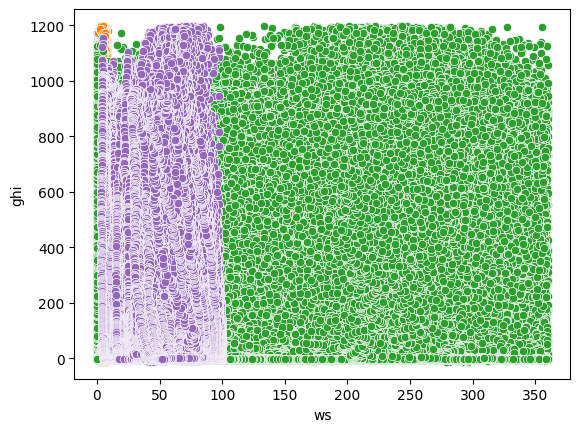

In [36]:

# -------------------------------------------
# 5️⃣ Correlation & Relationship Analysis
# -------------------------------------------
sns.heatmap(df_clean[["ghi","dni","dhi","tmoda","tmodb"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

sns.scatterplot(x="ws", y="ghi", data=df_clean)
sns.scatterplot(x="wsgust", y="ghi", data=df_clean)
sns.scatterplot(x="wd", y="ghi", data=df_clean)
sns.scatterplot(x="rh", y="tamb", data=df_clean)
sns.scatterplot(x="rh", y="ghi", data=df_clean)


## 6️⃣ Wind & Distribution Analysis

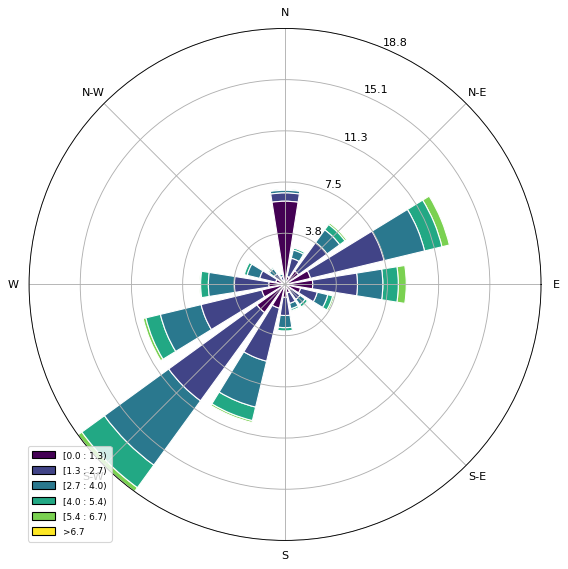

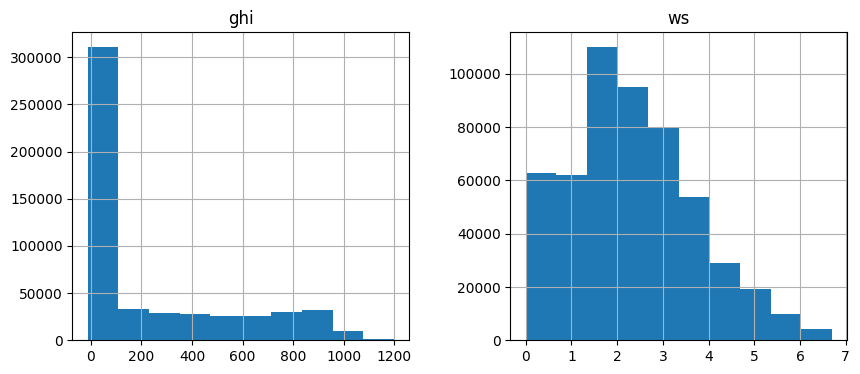

In [37]:

# -------------------------------------------
# 6️⃣ Wind & Distribution Analysis
# -------------------------------------------
ax = WindroseAxes.from_ax()
ax.bar(df_clean["wd"], df_clean["ws"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

df_clean[["ghi","ws"]].hist(figsize=(10,4))
plt.show()


## 7️⃣ Temperature Analysis & Bubble Chart

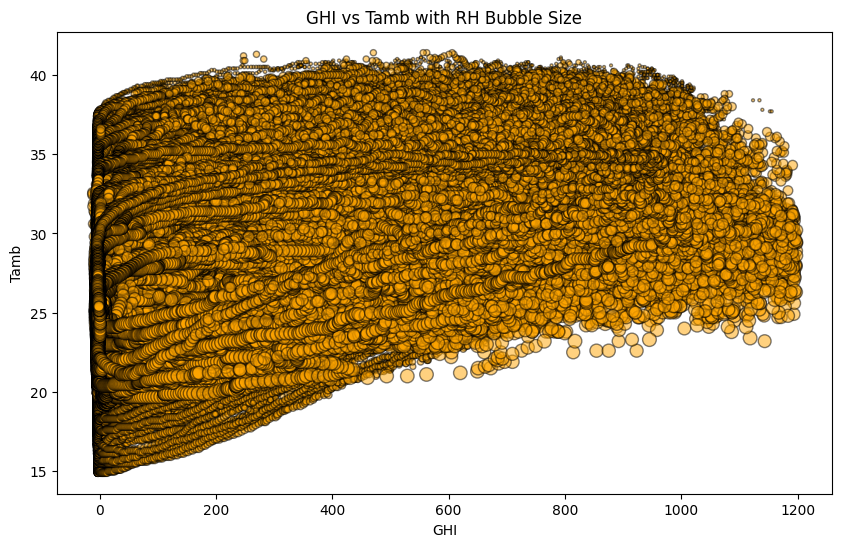

<Axes: xlabel='rh', ylabel='tamb'>

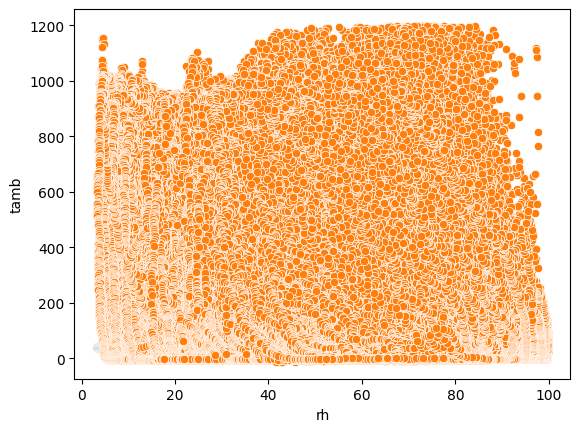

In [38]:

# -------------------------------------------
# 7️⃣ Temperature Analysis & Bubble Chart
# -------------------------------------------
plt.figure(figsize=(10,6))
plt.scatter(df_clean["ghi"], df_clean["tamb"], s=df_clean["rh"], alpha=0.5,
            c="orange", edgecolors="k")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb with RH Bubble Size")
plt.show()

sns.scatterplot(x="rh", y="tamb", data=df_clean)
sns.scatterplot(x="rh", y="ghi", data=df_clean)


# ✅ Summary & Next Steps

**Observations:**
- Cleaned dataset saved in `data/`.
- Outliers and missing values handled.
- Time series, correlations, wind behavior, and bubble charts analyzed.

**Next steps:**
1. Repeat EDA for Togo and Sierra Leone datasets.
2. Compare patterns across countries.
3. Prepare final combined report.
4. Begin modeling phase with cleaned datasets.
